In [1]:
!pip install dpkt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.0/195.0 KB 11.9 MB/s eta 0:00:00


In [9]:
!pip install scapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive

drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/22Project

/content/drive/MyDrive/22Project


# Purpose: 

With using .csv file, I have to declare multiple arrays.

To reduce memory and disk waste, I'll try to get throughput by using .pcap file

# Process:

1. Declare time array and throughput array that will be used as x-axis and y-axis
2. Set window size as 1
3. Check if each packet's timestamp is valid in setting time

```
# for i = 0 to maximum packet's time:
    If time <= packet's timestamp < time+window:
      thruput += packet's thruput
    else:
      move time as packet's timestamp and keep on comparing
```


# Dispute Point

1. big size of .pcap file -> takes long time to parsing.
- solution : split .pcap file to small size .pcap files.

2. To parse .pcap file, which module you'll use? 
- dpkt module ~ fatster, simple to use
- scapy module ~ slower, flexible


In [11]:
from sklearn.model_selection import train_test_split # To seperate train set and test set
from sklearn.linear_model import LinearRegression # To use linear regression
from scapy.all import * # To parse pcap file in colab

import dpkt # for parsing .pcap file
import numpy as np # for linear algebra
import matplotlib.pyplot as plt # to show data scatter, pgraph
import seaborn as sns
%matplotlib inline

In [6]:
timeArr = np.array([]) # Will be used as x-axis
throughputArr = np.array([]) # Will be used as y-axis

window = 1 # window size will be 1[sec] / for each window, read pcap file and check the throughput at that time

In [7]:
# get last packet's time in pcap file 
filename = "dataset_1126pcap.pcap" # Open the file (pcap)
with open(filename, "rb") as f:
  pcap = dpkt.pcap.Reader(f)
  last_ts = 0
  for ts, buf in pcap: # n = the number of packets // O(n)
    eth = dpkt.ethernet.Ethernet(buf)
    last_ts = ts

print(last_ts)

1668949467.840286


In [8]:
import math
captured_time = 1668940204 # first captured time

with open(filename, "rb") as f:
  pcap = dpkt.pcap.Reader(f)
  total_size = 0
  for ts, buf in pcap:
    eth = dpkt.ethernet.Ethernet(buf) # eth will be used to get size of the packet's
    if captured_time <= ts < captured_time + window: # 만약 해당 pkt의 ts가 captured_time과 captured_time+window 사이라면
      total_size += len(eth) # 해당 throughput을 저장

    else: # If packet's timestamp is bigger than captured time,
      timeArr = np.append(timeArr, captured_time) # Store time information in array
      throughputArr = np.append(throughputArr, total_size) # Store throughput information in array

      captured_time = math.floor(ts) # change captured_time as that packet's time
      total_size = len(eth) # store packet's thruput

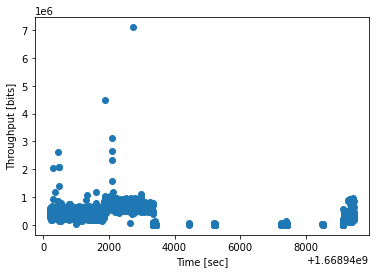

In [9]:
plt.xlabel('Time [sec]')
plt.ylabel('Throughput [bits]')
plt.scatter(timeArr, throughputArr)

---